<a href="https://colab.research.google.com/github/CobaMasa/PythonMachineLearningProgramming/blob/master/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[support](https://book.impress.co.jp/books/1117101099)

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
# Deploying Perceptron

class Perceptron(object):
    """Perceptron Classifier
    Params:
    eta: 0<= eta <= 1
    n_iter: int
    random_state: int
    ----------------------------
    Attributes:
    w_: 1-d array of weights
    errors_: list of errors in each epoch
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit tranning data into Perceptron model
        params:
        X: ndarray
        y: 1darray

        Returns 
        self
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=1.0, size=X.shape[1]+1)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.errors_.append(errors)
        
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

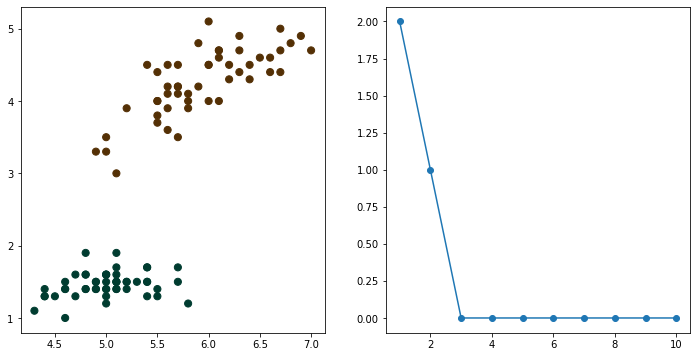

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

## extruct for trial
y = np.where(y.copy()[0:100]==0, 1, -1)
X = X.copy()[0:100, [0, 2]]

# plot it
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='BrBG')

# try it
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# show the result
ax[1].plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.show();